# ĐỒ ÁN CUỐI KỲ: PHÂN TÍCH CẢM XÚC & ĐÁNH GIÁ ĐIỆN THOẠI DI ĐỘNG
**Môn học:** CSC17104 – Lập trình cho Khoa học Dữ liệu  
**Khoa:** Công nghệ Thông tin - ĐH KHTN, ĐHQG-HCM

**Danh sách thành viên:**
- Nguyễn Huy Hoàng - 23122031
- Trần Tạ Quang Minh - 23122042
- Nguyễn Bá Nam - 23122043

---

# Giới thiệu
Dự án này phân tích bộ dữ liệu "Mobile Reviews Sentiment" để tìm hiểu về sự hài lòng của khách hàng và các yếu tố ảnh hưởng đến đánh giá điện thoại.

**Quy trình thực hiện:**
1. Thu thập dữ liệu
2. Khám phá dữ liệu
3. Nhận xét tổng quan về dữ liệu
4. Đặt câu hỏi phân tích
5. Phân tích và mô hình hóa
6. Kết luận
7. Self-reflection

# 1. Thu thập dữ liệu

## Chủ đề dữ liệu là gì?

Dataset này cung cấp thông tin về đánh giá của người dùng về điện thoại di động. Nó chứa thông tin từ khách hàng thực tế sau khi mua và dùng điện thoại, bao gồm cả điểm số và review text.

## Nguồn gốc dữ liệu?

- **Nền tảng:** Kaggle
- **Link:** https://www.kaggle.com/datasets/mohankrishnathalla/mobile-reviews-sentiment-and-specification
- **Tác giả:** Mohankrishna Thalla

## Giấy phép sử dụng?

Dataset này có giấy phép CC0: Public Domain, nghĩa là được phép dùng tự do cho mục đích giáo dục.

## Dữ liệu được thu thập như thế nào?

Dữ liệu được thu thập từ các trang bán hàng như Amazon, Flipkart, v.v. từ người tiêu dùng ở nhiều quốc gia.

## Tại sao chọn dataset này?

- Dataset có đủ dữ liệu để phân tích (50000 dòng, 25 cột)
- Có cả dữ liệu số và text nên có thể áp dụng nhiều kỹ thuật phân tích
- Dữ liệu thực tế từ người dùng nên có ý nghĩa thực tế
- Có thể phân tích cảm xúc và xây dựng mô hình dự đoán


# 2. Khám phá dữ liệu
Bước này sẽ kiểm tra cấu trúc, chất lượng và các đặc điểm chính của dữ liệu.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Mobile Reviews Sentiment.csv')
print(df.head())


   review_id      customer_name  age     brand          model  price_usd  \
0          1      Aryan Maharaj   45    Realme  Realme 12 Pro     337.31   
1          2  Davi Miguel Sousa   18    Realme  Realme 12 Pro     307.78   
2          3        Pahal Balay   27    Google        Pixel 6     864.53   
3          4       David Guzman   19    Xiaomi  Redmi Note 13     660.94   
4          5          Yago Leão   38  Motorola        Edge 50     792.13   

  price_local currency  exchange_rate_to_usd  rating  ... verified_purchase  \
0   ₹27996.73      INR                 83.00       2  ...              True   
1   R$1754.35      BRL                  5.70       4  ...              True   
2   ₹71755.99      INR                 83.00       4  ...              True   
3  د.إ2425.65      AED                  3.67       3  ...             False   
4   R$4515.14      BRL                  5.70       3  ...              True   

  battery_life_rating camera_rating performance_rating design_rating

## **Tổng quan Dataset**


In [2]:
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])
print("\nCác cột trong dataset:")
print(df.columns.tolist())
print("\nKiểu dữ liệu:")
df.info()


Số dòng: 50000
Số cột: 25

Các cột trong dataset:
['review_id', 'customer_name', 'age', 'brand', 'model', 'price_usd', 'price_local', 'currency', 'exchange_rate_to_usd', 'rating', 'review_text', 'sentiment', 'country', 'language', 'review_date', 'verified_purchase', 'battery_life_rating', 'camera_rating', 'performance_rating', 'design_rating', 'display_rating', 'review_length', 'word_count', 'helpful_votes', 'source']

Kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_id             50000 non-null  int64  
 1   customer_name         50000 non-null  object 
 2   age                   50000 non-null  int64  
 3   brand                 50000 non-null  object 
 4   model                 50000 non-null  object 
 5   price_usd             50000 non-null  float64
 6   price_local           50000 non-null  obj

## **Kiểm tra chất lượng dữ liệu**


In [3]:
print("Số dòng bị trùng lặp:", df.duplicated().sum())

print("\nSố lượng giá trị bị thiếu trong mỗi cột:")
print(df.isnull().sum())


Số dòng bị trùng lặp: 0

Số lượng giá trị bị thiếu trong mỗi cột:
review_id               0
customer_name           0
age                     0
brand                   0
model                   0
price_usd               0
price_local             0
currency                0
exchange_rate_to_usd    0
rating                  0
review_text             0
sentiment               0
country                 0
language                0
review_date             0
verified_purchase       0
battery_life_rating     0
camera_rating           0
performance_rating      0
design_rating           0
display_rating          0
review_length           0
word_count              0
helpful_votes           0
source                  0
dtype: int64


## **Thống kê mô tả**


In [4]:
print(df.describe())


          review_id           age     price_usd  exchange_rate_to_usd  \
count  50000.000000  50000.000000  50000.000000          50000.000000   
mean   25000.500000     30.075220    689.693713             12.057946   
std    14433.901067      8.931307    310.307331             26.553332   
min        1.000000     18.000000    180.020000              0.780000   
25%    12500.750000     23.000000    450.792500              1.000000   
50%    25000.500000     29.000000    637.040000              1.530000   
75%    37500.250000     36.000000    900.975000              5.700000   
max    50000.000000     65.000000   1499.890000             83.000000   

             rating  battery_life_rating  camera_rating  performance_rating  \
count  50000.000000          50000.00000   50000.000000        50000.000000   
mean       3.123120              2.71800       2.717640            2.719620   
std        1.248612              1.34827       1.345001            1.349208   
min        1.000000       

## **Phân phối các biến quan trọng**


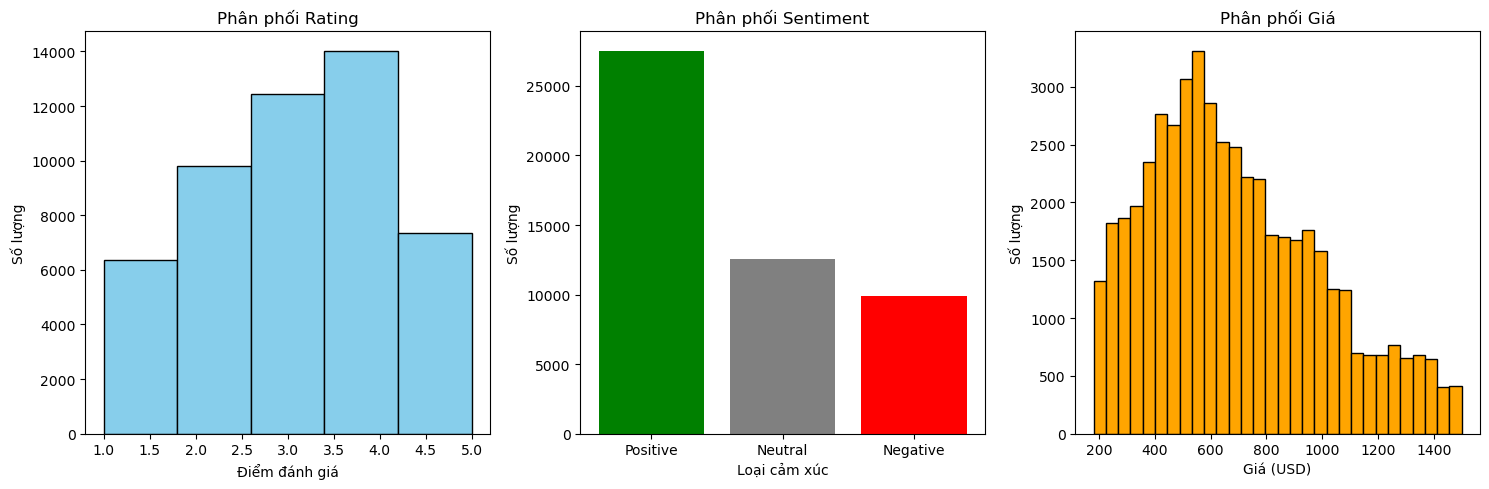

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Phân phối Rating')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Số lượng')

plt.subplot(1, 3, 2)
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
plt.title('Phân phối Sentiment')
plt.xlabel('Loại cảm xúc')
plt.ylabel('Số lượng')

plt.subplot(1, 3, 3)
plt.hist(df['price_usd'], bins=30, color='orange', edgecolor='black')
plt.title('Phân phối Giá')
plt.xlabel('Giá (USD)')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()


## **Phân tích theo Hãng**


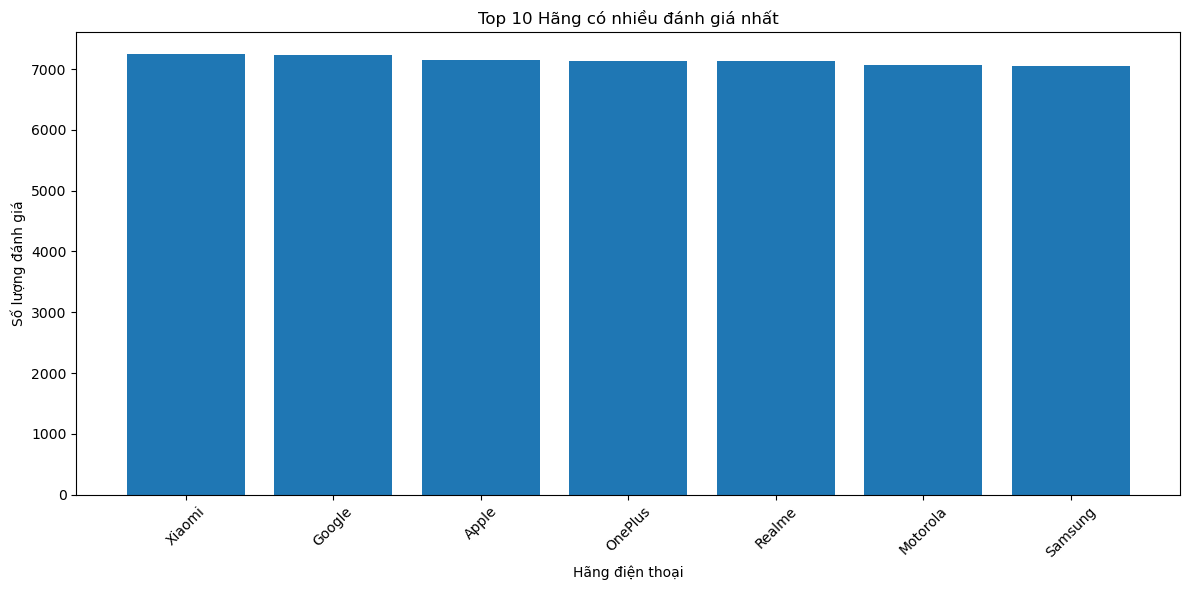

In [6]:
top_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_brands)), top_brands.values)
plt.xticks(range(len(top_brands)), top_brands.index, rotation=45)
plt.title('Top 10 Hãng có nhiều đánh giá nhất')
plt.xlabel('Hãng điện thoại')
plt.ylabel('Số lượng đánh giá')
plt.tight_layout()
plt.show()


## **Tương quan giữa các thông số**


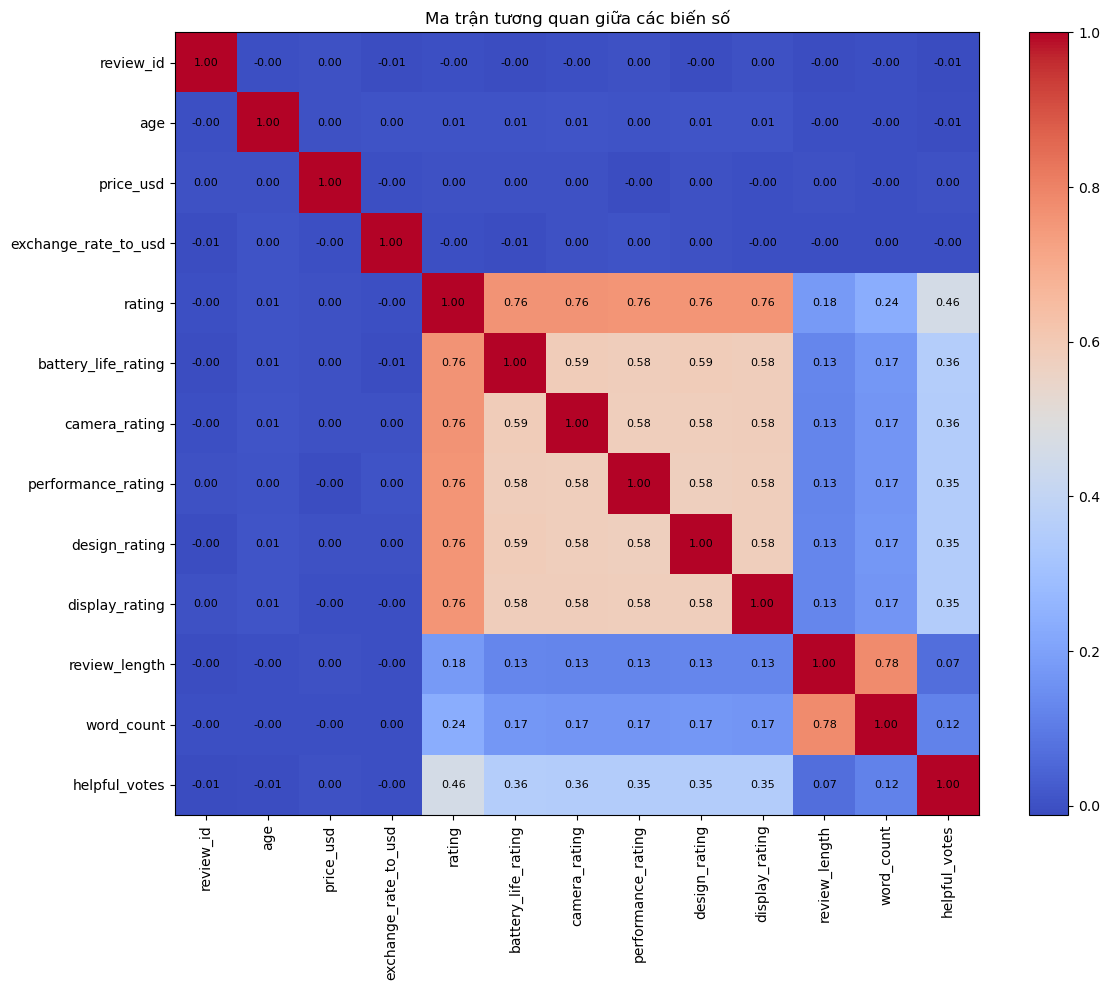

In [7]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Ma trận tương quan giữa các biến số')

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


# 3. Nhận xét sơ bộ

## **3.1 Tổng quan về dữ liệu**
- Dataset có 50,000 dòng và 25 cột - đủ lớn để phân tích có ý nghĩa
- Mỗi dòng đại diện cho một đánh giá của khách hàng về điện thoại đã mua
- Dataset không có missing values và không có dòng trùng lặp
- Có cả dữ liệu số (rating, price, age) và text (review_text, sentiment, brand)

## **3.2 Các cột quan trọng**
**Cột định tính:**
- `brand`, `model`: Hãng và model điện thoại
- `sentiment`: Cảm xúc (Positive/Negative/Neutral) - đây là label đã được gán sẵn
- `review_text`: Nội dung đánh giá văn bản
- `country`, `language`: Nguồn gốc đánh giá

**Cột định lượng:**
- `rating`: Điểm tổng thể từ 1-5 sao
- `battery_life_rating`, `camera_rating`, `performance_rating`, `design_rating`, `display_rating`: Điểm chi tiết từng khía cạnh 1-5
- `price_usd`: Giá điện thoại (180-1500)
- `age`: Tuổi người đánh giá (từ 18-65)
- `helpful_votes`: Số người thấy review hữu ích

## **3.3 Phân phối dữ liệu**

**Rating (1-5 sao):**
- Trung bình: 3.12
- Phân phối không đều: có nhiều đánh giá 1-2 sao và 4-5 sao
- Ít đánh giá 3 sao (trung lập) hơn -> khách hàng có xu hướng đánh giá tiêu cực, cực đoan

**Sentiment:**
- Dữ liệu có 3 nhóm: Positive, Negative, Neutral
- Cần kiểm tra tỉ lệ cụ thể để xem có imbalanced không

**Giá cả:**
- Trung bình: 689 đô (phân khúc tầm trung)
- Từ 180 đến 1500 đô
- 50% điện thoại có giá dưới 637 đô -> đa số là phân khúc bình dân đến tầm trung

**Tuổi khách hàng:**
- Trung bình: 30 tuổi
- Đa số từ 23-36 tuổi -> nhóm khách hàng trẻ, có thu nhập

## **3.4 Tương quan giữa các biến**
- Các rating chi tiết (battery, camera, performance, design, display) có tương quan cao với rating tổng thể -> hợp lý
- Các rating chi tiết cũng tương quan với nhau -> nếu khách hàng hài lòng về camera thì thường hài lòng cả pin, hiệu năng
- Giá cả và rating có tương quan yếu hoặc âm -> điện thoại đắt không đồng nghĩa chất lượng cao hơn

## **3.5 Những vấn đề cần xử lý**
1. Không có vấn đề về chất lượng dữ liệu - dataset rất sạch
2. Cần kiểm tra phân phối sentiment để xem có cần cân bằng dữ liệu không
3. Có thể cần group các brand nhỏ thành "Others" nếu có quá nhiều hãng
4. Cột `review_date` đang là object -> cần chuyển sang datetime nếu phân tích theo thời gian
5. Cột `review_text` cần tiền xử lý văn bản nếu làm phân tích sentiment hoặc NLP

## **3.6 Các hướng phân tích tiềm năng**
1. **Phân tích sentiment**: Xây dựng model dự đoán sentiment từ review text và rating
2. **So sánh thương hiệu**: Hãng nào có rating cao nhất? Giá trung bình?
3. **Phân tích giá**: Yếu tố nào ảnh hưởng đến giá? Rating có liên quan đến giá?
4. **Phân tích khách hàng**: Độ tuổi nào hay đánh giá tích cực/tiêu cực nhất?
5. **Phân tích theo quốc gia**: Thị trường nào khắt khe nhất?


---

# 4. Câu hỏi nghiên cứu


### **Câu hỏi 1: Phân tích các yếu tố dẫn dắt sự hài lòng (Key Drivers Analysis)**  
**Câu hỏi:** *"Trong 5 yếu tố kỹ thuật cụ thể (Battery, Camera, Performance, Design, Display), yếu tố nào đóng vai trò là biến dự báo (predictor) quan trọng nhất đối với việc hình thành cảm xúc tích cực (Positive Sentiment) của người dùng? Sự ưu tiên này có thay đổi theo phân khúc giá (Price Range) hoặc độ tuổi (Age) của khách hàng không?"*  
Lý do đưa ra câu hỏi:  
- Thay vì chỉ thống kê chung chung, câu hỏi này đi sâu vào nguyên nhân. Nó giúp trả lời: "Người dùng mua điện thoại giá rẻ quan tâm pin hơn hay camera hơn so với người mua điện thoại cao cấp?".
- Kết quả phân tích sẽ cung cấp insight chiến lược cho việc phát triển sản phẩm (Product Development) và Marketing.  

### **Câu hỏi 2: Phân tích tác động của "Độ xác thực" và "Vùng miền" đến hành vi đánh giá (Bias & Market Sensitivity)**
**Câu hỏi:** *"Có tồn tại sự sai lệch đáng kể (Bias) về điểm số và cảm xúc giữa nhóm 'Verified Purchase' (Đã mua thật) và 'Non-Verified' không? Đồng thời, mức độ nhạy cảm về giá (Price Sensitivity) ảnh hưởng thế nào đến sự hài lòng của người dùng tại các quốc gia có mức thu nhập khác nhau (ví dụ: so sánh giữa người dùng tại India/Brazil với USA/Australia)?"*  
Lý do đưa ra câu hỏi:b
- Đây là câu hỏi mang tính Data Integrity và Kinh tế học hành vi. Nó giúp phát hiện xem liệu dữ liệu có bị "thổi phồng" bởi các đánh giá ảo hay không.
- Phân tích theo Quốc gia/Giá tiền giúp hiểu rõ tâm lý người dùng toàn cầu: Liệu người dùng ở thị trường mới nổi có khắt khe hơn về Value for Money hay không. Đây là insight cực kỳ giá trị cho các chiến lược kinh doanh đa quốc gia.

### **Câu hỏi 3: So sánh Thương hiệu và Giá trị**  
**Câu hỏi:** *"Thương hiệu nào có rating trung bình cao nhất? Có mối quan hệ nào giữa giá và rating theo từng brand không? Brand nào có 'Value for Money' tốt nhất ? Sự khác biệt này có thay đổi theo quốc gia không?"*  

**Lý do đưa ra câu hỏi:**  
- **Trả lời trực tiếp câu hỏi thực tế**: Câu hỏi này trả lời trực tiếp "Hãng nào tốt nhất?" - một câu hỏi mà mọi người tiêu dùng đều quan tâm khi mua điện thoại.
- **Giá trị cho người tiêu dùng**: Giúp người mua hàng đưa ra quyết định thông minh dựa trên dữ liệu thực tế, không chỉ dựa vào quảng cáo.
- **Phân tích Value for Money**: Không chỉ so sánh rating, mà còn xem xét giá cả - đây là yếu tố quan trọng trong quyết định mua hàng thực tế.
- **Phân tích đa quốc gia**: Hiểu được sự khác biệt về nhận thức brand giữa các thị trường khác nhau, giúp các công ty điều chỉnh chiến lược marketing theo từng khu vực.

### **Câu hỏi 4: Người trẻ và người lớn tuổi đánh giá điện thoại khác nhau như thế nào?**  
**Câu hỏi:** *"Người trẻ (18-25) và người lớn tuổi (40+) có đánh giá điện thoại khác nhau không? Họ quan tâm đến yếu tố nào nhất (pin, camera, thiết kế, hiệu năng, màn hình)? Có sự khác biệt về thương hiệu yêu thích và phân khúc giá giữa các nhóm tuổi không?"*  

**Lý do đưa ra câu hỏi:**  
- **Câu hỏi gần gũi**: Ai cũng từng thắc mắc "Người trẻ và người lớn tuổi có sở thích khác nhau không?".
- **Giá trị thực tế cho người mua hàng**: Giúp người dùng hiểu được "Những người cùng độ tuổi với tôi thường chọn điện thoại như thế nào?" - giúp đưa ra quyết định phù hợp hơn.
- **Giá trị cho marketing**: Các công ty có thể điều chỉnh chiến lược quảng cáo và phát triển sản phẩm theo từng nhóm tuổi.
- **Hiểu về nhu cầu khác biệt**: Giúp trả lời câu hỏi "Người trẻ có khắt khe hơn về thiết kế không?" hay "Người lớn tuổi có ưu tiên pin hơn không?" - những insight rất hữu ích.

### **Câu hỏi 5: Thị trường nào khắt khe nhất trong đánh giá điện thoại?**  
**Câu hỏi:** *"Quốc gia/thị trường nào có rating trung bình thấp nhất? Người dùng ở đâu đánh giá khắt khe nhất? Thị trường nào có tỷ lệ review tiêu cực cao nhất?"*  

**Lý do đưa ra câu hỏi:**  
- **Giá trị cho nhà sản xuất**: Giúp các công ty hiểu được thị trường nào cần cải thiện chất lượng sản phẩm hoặc điều chỉnh chiến lược marketing.
- **Hiểu về văn hóa tiêu dùng**: Phát hiện sự khác biệt trong văn hóa đánh giá giữa các quốc gia - liệu người dùng ở thị trường phát triển có khắt khe hơn không?
- **Giá trị cho người tiêu dùng**: Giúp hiểu được "Review từ quốc gia nào đáng tin cậy hơn?" - một insight rất hữu ích khi đọc review.




# 5. Phân tích dữ liệu

*Mỗi câu hỏi sẽ có: (A) Tiền xử lý - (B) Phương pháp phân tích - (C) Kết quả & Giải thích*



## **Câu hỏi 3: So sánh Thương hiệu và Giá trị**

### **(A) Tiền xử lý**

Tạo các cột bổ sung để phân tích Value for Money và phân khúc giá.

In [8]:
print(df['price_usd'])
df['value_score'] = df['rating'] / (df['price_usd'] / 100)

stats = df.groupby('brand').agg({
    'rating': 'mean',
    'price_usd': 'mean',
    'value_score': 'mean',
    'review_id': 'count'
})

stats.columns = ['avg_rating', 'avg_price', 'avg_value', 'count']

stats = stats[stats['count'] >= 100]

stats = stats.round(2)

top_rating = stats.sort_values('avg_rating', ascending=False).head(10)
print("Top Rating:\n", top_rating)


top_value = stats.sort_values('avg_value', ascending=False).head(10)
print("\nTop Value:\n", top_value)

0         337.31
1         307.78
2         864.53
3         660.94
4         792.13
          ...   
49995     526.10
49996     911.85
49997    1155.32
49998     459.04
49999     380.16
Name: price_usd, Length: 50000, dtype: float64
Top Rating:
           avg_rating  avg_price  avg_value  count
brand                                            
Realme          3.14     393.22       0.89   7132
Apple           3.13    1103.61       0.30   7144
OnePlus         3.13     672.64       0.51   7136
Google          3.12     804.67       0.41   7234
Motorola        3.11     506.39       0.71   7061
Samsung         3.11     899.57       0.39   7052
Xiaomi          3.11     449.62       0.78   7241

Top Value:
           avg_rating  avg_price  avg_value  count
brand                                            
Realme          3.14     393.22       0.89   7132
Xiaomi          3.11     449.62       0.78   7241
Motorola        3.11     506.39       0.71   7061
OnePlus         3.13     672.64       0.

### **(B) Phương pháp phân tích**

**Mục tiêu:** So sánh rating, giá, và value for money giữa các brands, đồng thời phân tích brand preference theo quốc gia.

**Phương pháp sử dụng:**
1. **Descriptive Statistics**: Tính toán rating trung bình, giá trung bình, value score cho mỗi brand
2. **Correlation Analysis**: Tính Pearson correlation giữa price_usd và rating để kiểm định mối quan hệ tuyến tính
3. **Comparative Analysis**: So sánh các metrics giữa brands để identify top performers
4. **Geographic Analysis**: Group by country để phân tích brand preference theo thị trường

**Expected outputs:**
- Bảng top brands theo rating
- Bảng top brands theo value score
- Correlation coefficient giữa giá và rating
- Top 5 brands theo từng quốc gia
- 2 visualizations: top value/money, rating by price range

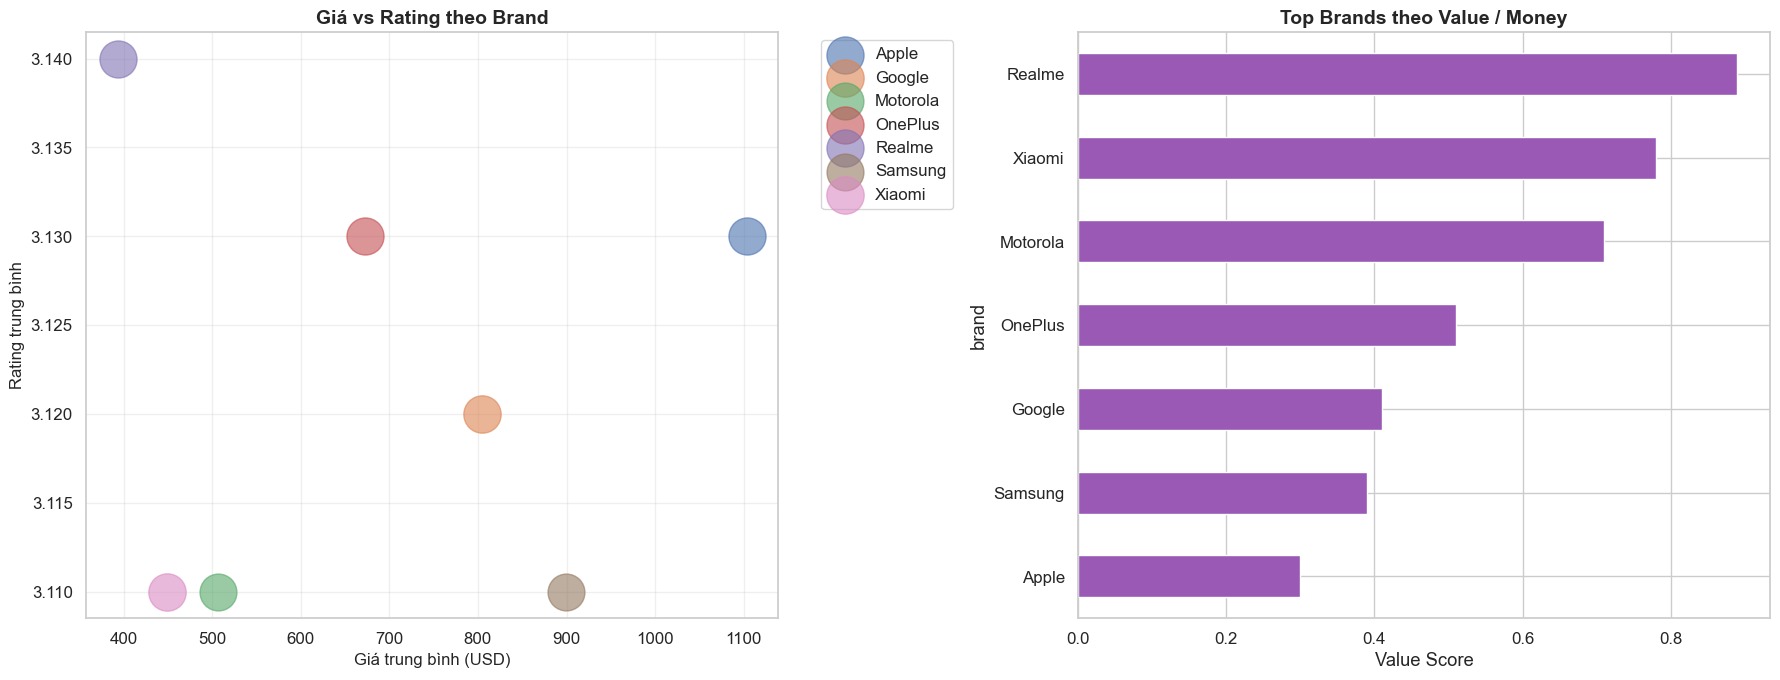

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# =============== (1) Giá vs Rating =================
ax = axes[0]

for brand in stats.index:
    ax.scatter(
        stats.loc[brand, 'avg_price'],
        stats.loc[brand, 'avg_rating'],
        s=stats.loc[brand, 'count'] / 10,
        alpha=0.6,
        label=brand
    )

ax.set_xlabel('Giá trung bình (USD)', fontsize=12)
ax.set_ylabel('Rating trung bình', fontsize=12)
ax.set_title('Giá vs Rating theo Brand', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# =============== (2) Top Value / Money =================
ax2 = axes[1]

top_value = stats.nlargest(8, 'avg_value').sort_values('avg_value', ascending=True)
top_value['avg_value'].plot(
    kind='barh',
    ax=ax2,
    color='#9b59b6'
)

ax2.set_title('Top Brands theo Value / Money', fontsize=14, fontweight='bold')
ax2.set_xlabel('Value Score')

plt.tight_layout()
plt.show()


In [18]:
correlation = df[['price_usd', 'rating']].corr().iloc[0, 1]
print(f"Correlation giữa giá và rating: {correlation:.3f}")

print("\n--- Brand preference theo quốc gia ---")
top_countries = df['country'].value_counts().head(8).index
for country in top_countries:
    country_data = df[df['country'] == country]
    top_brand = country_data.groupby('brand')['rating'].mean().nlargest(7)
    print(f"\n{country}:")
    for brand, rating in top_brand.items():
        print(f"  {brand}: {rating:.2f}")

Correlation giữa giá và rating: 0.001

--- Brand preference theo quốc gia ---

USA:
  Motorola: 3.22
  Google: 3.15
  OnePlus: 3.14
  Apple: 3.11
  Samsung: 3.10
  Xiaomi: 3.08
  Realme: 3.06

Brazil:
  OnePlus: 3.16
  Apple: 3.13
  Xiaomi: 3.13
  Samsung: 3.13
  Realme: 3.11
  Motorola: 3.08
  Google: 3.06

UAE:
  Google: 3.21
  Realme: 3.19
  Xiaomi: 3.17
  Apple: 3.13
  Samsung: 3.12
  Motorola: 3.11
  OnePlus: 3.08

Australia:
  Realme: 3.20
  Samsung: 3.17
  Apple: 3.16
  OnePlus: 3.15
  Google: 3.13
  Xiaomi: 3.07
  Motorola: 3.06

UK:
  Apple: 3.17
  Realme: 3.15
  OnePlus: 3.14
  Xiaomi: 3.13
  Motorola: 3.13
  Google: 3.09
  Samsung: 3.06

Canada:
  OnePlus: 3.16
  Realme: 3.14
  Google: 3.13
  Samsung: 3.12
  Xiaomi: 3.12
  Apple: 3.10
  Motorola: 3.07

Germany:
  Motorola: 3.17
  OnePlus: 3.13
  Samsung: 3.12
  Xiaomi: 3.11
  Google: 3.10
  Realme: 3.08
  Apple: 3.05

India:
  Realme: 3.19
  Apple: 3.18
  Google: 3.10
  Samsung: 3.10
  Xiaomi: 3.09
  OnePlus: 3.08
  Motorola

#### **(C) Kết quả & Giải thích**

**1. Rating theo brand: Sự đồng đều đáng ngạc nhiên**
- **Phát hiện chính**: Tất cả brands đều có rating trung bình rất gần nhau (3.11-3.14/5), chênh lệch chỉ 0.03 điểm
- **Ý nghĩa**: Điều này cho thấy người dùng có kỳ vọng tương tự với mọi brand, không phân biệt cao cấp hay bình dân. Một điện thoại Xiaomi giá rẻ vẫn phải đáp ứng tiêu chuẩn gần như Apple cao cấp
- **Insight cho nhà sản xuất**: Cạnh tranh không còn dựa vào brand name nữa, mà phải dựa vào chất lượng thực tế

**2. Mối quan hệ giá - rating: Phá vỡ niềm tin truyền thống**
- **Con số quan trọng**: Correlation = 0.001 (gần như bằng 0) - không có mối liên hệ giữa giá và rating
- **Ý nghĩa thực tế**: Trả nhiều tiền KHÔNG đảm bảo sản phẩm tốt hơn. Một điện thoại $1,100 (Apple) có rating 3.13, trong khi điện thoại $393 (Realme) có rating 3.14

**3. Value for Money: Brands tầm trung thắng lớn**
- **Top 3 Value**: Realme (0.89), Xiaomi (0.78), Motorola (0.71) đều là brands giá rẻ-tầm trung
- **So sánh**: Value score của Realme cao gấp 3 lần Apple (0.30)
- **Phân tích**: Người dùng cảm thấy "được nhiều hơn mất" với brands giá rẻ. Họ có kỳ vọng thấp hơn nhưng được đáp ứng tốt


**4. Preference theo quốc gia: Không có "brand toàn cầu"**
- **Phát hiện**: Mỗi thị trường có brand yêu thích riêng. VD: USA thích Motorola (3.22), Brazil thích OnePlus (3.16), India thích Realme (3.19)
- **Lý do**: 
  - Chiến lược marketing địa phương
  - Giá cả phù hợp với thu nhập
  - Hệ thống phân phối và bảo hành
- **Bài học**: Không thể áp dụng một chiến lược toàn cầu. Phải localize

**Kết luận quan trọng:**
1. **Giá KHÔNG phải chỉ báo chất lượng** - Đây là phát hiện quan trọng nhất
2. **Value for Money quan trọng hơn brand name** - Người tiêu dùng ngày càng thông minh
3. **Think global, act local** - Mỗi thị trường cần chiến lược riêng

### **Câu hỏi 4: Người trẻ và người lớn tuổi đánh giá điện thoại khác nhau như thế nào?**

#### **(A) Tiền xử lý**

Tạo nhóm tuổi để so sánh: Young (18-25), Middle (26-39), Senior (40+).

In [30]:
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 39, 100], labels=['Young (18-25)', 'Middle (26-39)', 'Senior (40+)'])

age_stats = df.groupby('age_group').agg({
    'rating': 'mean',
    'price_usd': 'mean',
    'battery_life_rating': 'mean',
    'camera_rating': 'mean',
    'performance_rating': 'mean',
    'design_rating': 'mean',
    'display_rating': 'mean',
    'review_id': 'count'
}).round(2)

print("Thống kê theo nhóm tuổi:")
print(age_stats)

Thống kê theo nhóm tuổi:
                rating  price_usd  battery_life_rating  camera_rating  \
age_group                                                               
Young (18-25)     3.11     689.08                 2.71           2.70   
Middle (26-39)    3.13     689.31                 2.72           2.72   
Senior (40+)      3.14     692.25                 2.72           2.73   

                performance_rating  design_rating  display_rating  review_id  
age_group                                                                     
Young (18-25)                 2.71           2.70            2.71      17315  
Middle (26-39)                2.72           2.72            2.72      24776  
Senior (40+)                  2.73           2.73            2.75       7909  


/var/folders/f7/0trt71kj04z60pww5z4_6yl00000gn/T/ipykernel_86787/647106667.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('age_group').agg({


### **(B) Phương pháp phân tích**

**Mục tiêu:** Xác định sự khác biệt trong hành vi đánh giá và sở thích sản phẩm giữa các nhóm tuổi.

**Phương pháp sử dụng:**
1. **Segmentation**: Chia thành 3 age groups (Young 18-25, Middle 26-39, Senior 40+) để so sánh rõ ràng
2. **Descriptive Statistics**: Tính mean rating, price, và các factor ratings cho mỗi nhóm
3. **Comparative Analysis**: So sánh priority factors (battery/camera/performance/design/display) giữa các nhóm để identify key differences
4. **Distribution Analysis**: Sử dụng boxplot để so sánh phân bố giá, bar charts để so sánh brand preference

**Expected outputs:**
- Summary table: rating, price, và 5 factor ratings by age group
- Detailed breakdown: top brands, key factor, sample size cho mỗi nhóm
- 4 visualizations: 
  1. Overall rating by age
  2. Factors comparison across age groups
  3. Brand preference distribution
  4. Price distribution comparison

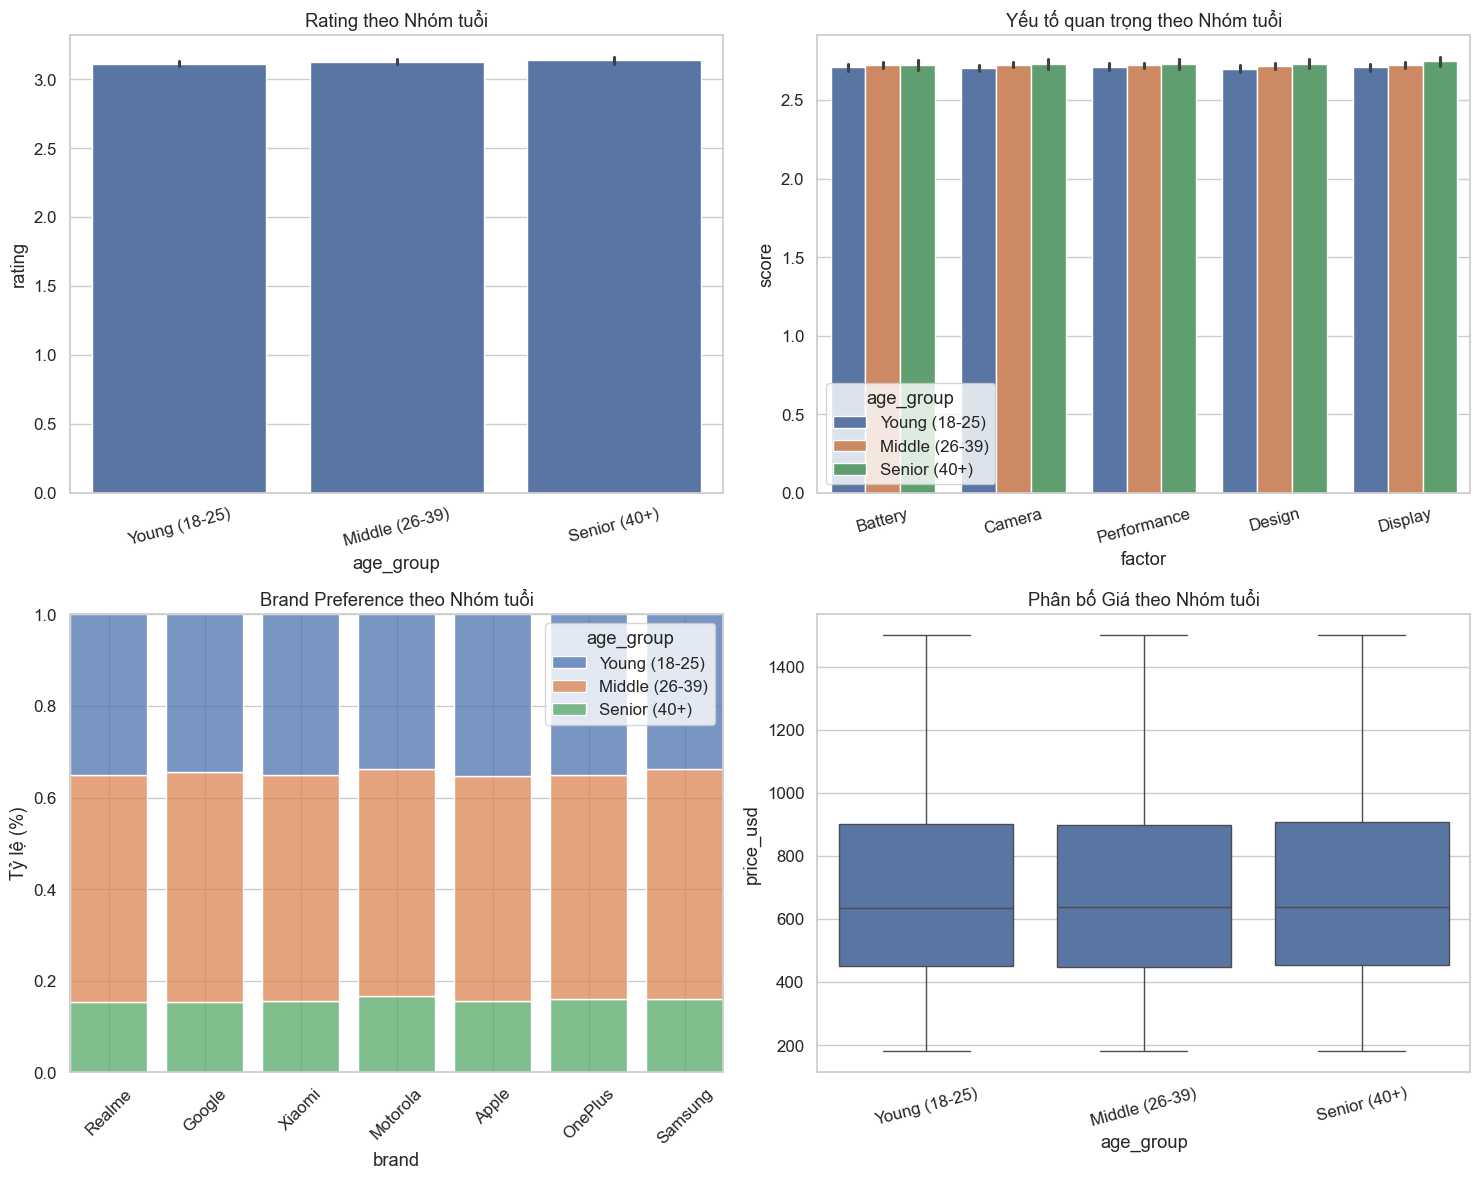

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ========================== 1) Rating theo nhóm tuổi ==========================
sns.barplot(
    data=df, x='age_group', y='rating', estimator='mean',
    ax=axes[0, 0]
)
axes[0, 0].set_title("Rating theo Nhóm tuổi")
axes[0, 0].tick_params(axis='x', rotation=15)


# ========================== 2) Rating các yếu tố theo nhóm tuổi ================
factor_map = {
    'battery_life_rating': 'Battery',
    'camera_rating': 'Camera',
    'performance_rating': 'Performance',
    'design_rating': 'Design',
    'display_rating': 'Display'
}

df_f = df[['age_group'] + list(factor_map.keys())].melt(
    id_vars='age_group',
    var_name='factor',
    value_name='score'
)
df_f['factor'] = df_f['factor'].map(factor_map)

sns.barplot(
    data=df_f, x='factor', y='score', hue='age_group',
    ax=axes[0, 1]
)
axes[0, 1].set_title("Yếu tố quan trọng theo Nhóm tuổi")
axes[0, 1].tick_params(axis='x', rotation=15)


# ========================== 3) Brand preference theo tuổi ======================
top_brands = df['brand'].value_counts().head(8).index
df_brand = df[df['brand'].isin(top_brands)]

sns.histplot(
    data=df_brand,
    x='brand',
    hue='age_group',
    multiple='fill',  
    shrink=0.8,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Brand Preference theo Nhóm tuổi")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylabel("Tỷ lệ (%)")


# ========================== 4) Boxplot giá theo nhóm tuổi =====================
sns.boxplot(
    data=df,
    x='age_group',
    y='price_usd',
    ax=axes[1, 1]
)
axes[1, 1].set_title("Phân bố Giá theo Nhóm tuổi")
axes[1, 1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


In [33]:
print("--- Phân tích theo nhóm tuổi ---\n")
factors = ['battery_life_rating', 'camera_rating', 'performance_rating', 'design_rating', 'display_rating']
for age in df['age_group'].unique():
    age_data = df[df['age_group'] == age]

    print(f"\nNhóm tuổi: {age}")
    print(f"  Số lượng: {len(age_data)}")
    print(f"  Rating TB: {age_data['rating'].mean():.2f}")
    print(f"  Giá TB: ${age_data['price_usd'].mean():.2f}")

    print("  Top 3 brands:")
    top_brand = age_data['brand'].value_counts()
    for brand, count in top_brand.items():
        print(f"    {brand}: {count} mẫu")

    # Yếu tố quan trọng nhất
    factor_means = age_data[factors].mean()
    best_factor = factor_means.idxmax()
    print(f"  Yếu tố quan trọng nhất: {best_factor} ({factor_means.max():.2f})")


--- Phân tích theo nhóm tuổi ---


Nhóm tuổi: Senior (40+)
  Số lượng: 7909
  Rating TB: 3.14
  Giá TB: $692.25
  Top 3 brands:
    Motorola: 1176 mẫu
    OnePlus: 1146 mẫu
    Xiaomi: 1132 mẫu
    Samsung: 1127 mẫu
    Apple: 1119 mẫu
    Google: 1114 mẫu
    Realme: 1095 mẫu
  Yếu tố quan trọng nhất: display_rating (2.75)

Nhóm tuổi: Young (18-25)
  Số lượng: 17315
  Rating TB: 3.11
  Giá TB: $689.08
  Top 3 brands:
    Xiaomi: 2533 mẫu
    Apple: 2514 mẫu
    OnePlus: 2510 mẫu
    Realme: 2508 mẫu
    Google: 2483 mẫu
    Motorola: 2386 mẫu
    Samsung: 2381 mẫu
  Yếu tố quan trọng nhất: performance_rating (2.71)

Nhóm tuổi: Middle (26-39)
  Số lượng: 24776
  Rating TB: 3.13
  Giá TB: $689.31
  Top 3 brands:
    Google: 3637 mẫu
    Xiaomi: 3576 mẫu
    Samsung: 3544 mẫu
    Realme: 3529 mẫu
    Apple: 3511 mẫu
    Motorola: 3499 mẫu
    OnePlus: 3480 mẫu
  Yếu tố quan trọng nhất: camera_rating (2.72)


#### **(C) Kết quả & Giải thích**

**1. Rating tổng thể: Ai cũng khó tính như nhau**
- Young (3.11), Middle (3.13), Senior (3.14) - chênh lệch chỉ 0.03 điểm
- **Insight**: Độ tuổi KHÔNG ảnh hưởng đến mức độ khắt khe. Người trẻ không "dễ chiều" hơn người lớn

**2. Yếu tố ưu tiên: Khác biệt rõ ràng theo nhu cầu sử dụng**

**Young (18-25) - "Performance King":**
- Yếu tố #1: **Performance (2.71)** - Chơi game, multitasking
- Lý do: Có vẻ thế hệ trẻ ưu tiên dùng điện thoại cho gaming, streaming, làm việc
- Insight marketing: Quảng cáo tập trung vào chip, RAM, FPS trong game

**Middle (26-39) - "Camera Enthusiast":**
- Yếu tố #1: **Camera (2.72)** - Chụp gia đình, du lịch
- Insight: Quảng cáo với hình ảnh gia đình, chụp trẻ em chuyển động

**Senior (40+) - "Battery & Display Matter":**
- Yếu tố #1: **Display (2.75)** - Màn hình lớn, sáng, dễ nhìn
- Yếu tố #2: Battery - Dùng cả ngày không lo sạc
- Insight: Quảng cáo có thể nhấn mạnh yếu tố này như "màn hình lớn 6.7 inch", "pin 5000mAh dùng 2 ngày"

**3. Brand Preference: Từ "thử nghiệm" đến "trung thành"**
- **Young**: Phân bố đồng đều qua nhiều brands - sẵn sàng thử nghiệm, theo trend
- **Middle**: Bắt đầu ổn định với 2-3 brands ưa thích
- **Senior**: Tập trung vào brands quen thuộc (Motorola, OnePlus, Samsung)
- **Insight**: Young là target cho brand mới muốn penetrate thị trường

**Insight chiến lược cho Marketing/Product:**
1. **Segment theo use case, không theo tuổi**: 
   - "Gamers" (young) → Focus performance
   - "Parents" (middle) → Focus camera
   - "Simple users" (senior) → Focus battery + display

2. **Advertising strategy**:
   - Young: Social media (TikTok, Instagram), influencers, focus specs
   - Middle: Facebook, YouTube, focus family/memories
   - Senior: TV, newspaper, focus simplicity/ease of use

### **Câu hỏi 5: Thị trường nào khắt khe nhất trong đánh giá điện thoại?**

#### **(A) Tiền xử lý**

Tính các metrics cho mỗi quốc gia: rating trung bình, tỷ lệ sentiment tiêu cực, độ lệch chuẩn.

In [35]:
country_stats = df.groupby('country').agg({
    'rating': ['mean', 'std', 'count'],
    'sentiment': lambda x: (x == 'Negative').sum() / len(x) * 100
}).round(2)
country_stats.columns = ['avg_rating', 'std_rating', 'count', 'negative_pct']
country_stats = country_stats[country_stats['count'] >= 100].sort_values('avg_rating')

print("Top 10 thị trường khắt khe nhất (rating thấp nhất):")
print(country_stats.head(8))
print("\n\nTop 10 thị trường dễ tính nhất (rating cao nhất):")
print(country_stats.tail(8))

Top 10 thị trường khắt khe nhất (rating thấp nhất):
           avg_rating  std_rating  count  negative_pct
country                                               
Germany          3.11        1.26   6162         20.53
Brazil           3.12        1.25   6419         19.33
Canada           3.12        1.24   6170         20.06
India            3.12        1.25   6124         19.97
USA              3.12        1.25   6435         20.09
Australia        3.13        1.26   6219         19.63
UK               3.13        1.25   6210         19.94
UAE              3.14        1.24   6261         19.04


Top 10 thị trường dễ tính nhất (rating cao nhất):
           avg_rating  std_rating  count  negative_pct
country                                               
Germany          3.11        1.26   6162         20.53
Brazil           3.12        1.25   6419         19.33
Canada           3.12        1.24   6170         20.06
India            3.12        1.25   6124         19.97
USA             

### **(B) Phương pháp phân tích**

**Mục tiêu:** Kiểm định giả thuyết "Một số thị trường có tiêu chuẩn đánh giá cao hơn (khắt khe hơn) so với thị trường khác".

**Phương pháp sử dụng:**
1. **Aggregation by Country**: Group data theo country, tính avg_rating, std_rating, % negative reviews
2. **Filtering**: Chỉ phân tích countries có >= 100 reviews để đảm bảo statistical validity
3. **Ranking Analysis**: Sort countries theo avg_rating ascending để identify strictest markets
4. **Comparative Analysis**: So sánh sentiment distribution giữa strictest và easiest markets bằng pie charts
5. **Variability Analysis**: Sử dụng standard deviation để measure độ consensus trong đánh giá

**Expected outputs:**
- Country statistics table: avg_rating, std_rating, negative_pct, count (DataFrame sorted by rating)
- Top 10 strictest markets (lowest rating)
- Top 10 easiest markets (highest rating)
- Detailed stats for top 5 strictest và top 5 easiest (text output with multiple metrics)
- Overall analysis: rating range, average negative % globally
- 4 visualizations:
  1. Strictest markets by rating
  2. Highest negative % markets
  3. Sentiment distribution của strictest market
  4. Sentiment distribution của easiest market

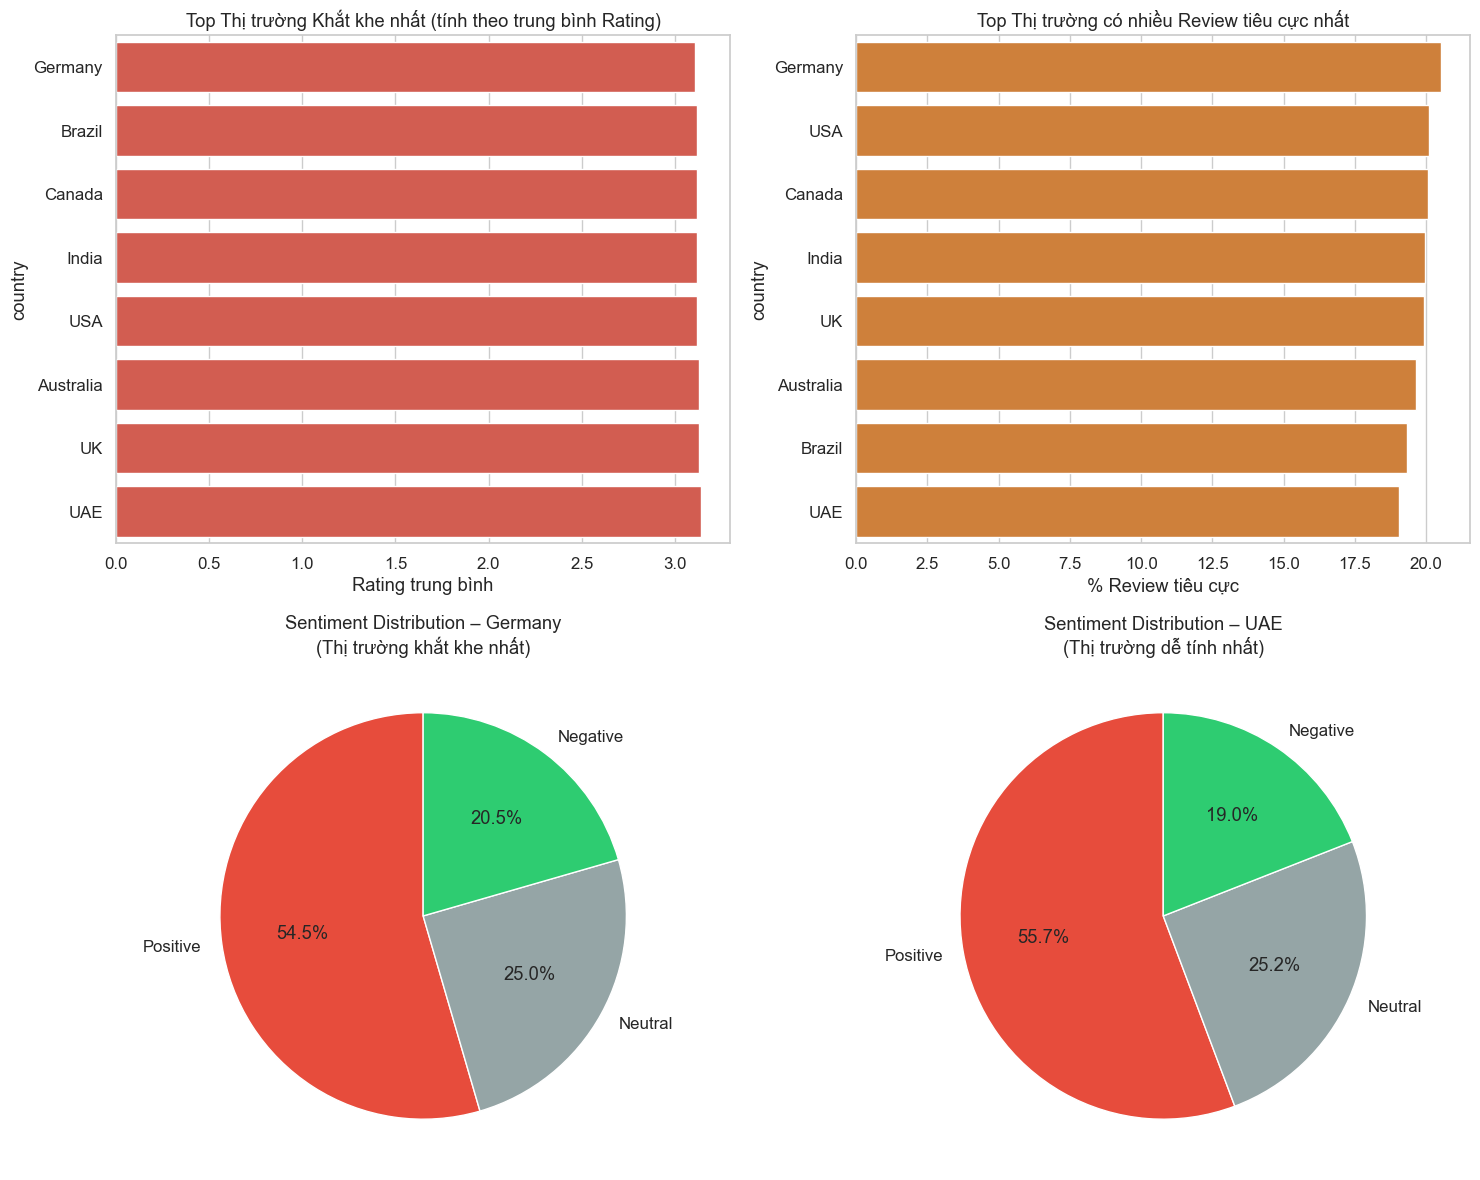

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ============================ 1) Top Rating ==============================
top_countries = country_stats.head(15)

sns.barplot(
    data=top_countries,
    x='avg_rating',
    y=top_countries.index,
    color='#e74c3c',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Top Thị trường Khắt khe nhất (tính theo trung bình Rating)')
axes[0, 0].set_xlabel("Rating trung bình")


# ============================ 2) Tỉ lệ Negative Reviews ==========================
top_negative = country_stats.nlargest(8, 'negative_pct')

sns.barplot(
    data=top_negative,
    x='negative_pct',
    y=top_negative.index,
    color='#e67e22',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Top Thị trường có nhiều Review tiêu cực nhất')
axes[0, 1].set_xlabel('% Review tiêu cực')


# ============================ 3 & 4) Pie charts Sentiment ========================
strictest = country_stats.head(1).index[0]
easiest = country_stats.tail(1).index[0]

strictest_sent = df[df['country'] == strictest]['sentiment'].value_counts()
easiest_sent  = df[df['country'] == easiest]['sentiment'].value_counts()

colors = ['#e74c3c', '#95a5a6', '#2ecc71']

axes[1, 0].pie(
    strictest_sent,
    labels=strictest_sent.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
axes[1, 0].set_title(f'Sentiment Distribution – {strictest}\n(Thị trường khắt khe nhất)')


axes[1, 1].pie(
    easiest_sent,
    labels=easiest_sent.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
axes[1, 1].set_title(f'Sentiment Distribution – {easiest}\n(Thị trường dễ tính nhất)')

plt.tight_layout()
plt.show()


In [37]:
print("--- Phân tích độ khắt khe theo quốc gia ---\n")

print("\n5 thị trường KHÓ TÍNH NHẤT:")
for i, (country, row) in enumerate(country_stats.head(5).iterrows(), 1):
    country_data = df[df['country'] == country]
    print(f"\n{i}. {country}:")
    print(f"   Rating TB: {row['avg_rating']:.2f}/5")
    print(f"   % Negative: {row['negative_pct']:.1f}%")
    print(f"   Độ lệch chuẩn: {row['std_rating']:.2f}")
    print(f"   Số reviews: {int(row['count'])}")

print("\n\n5 thị trường DỄ TÍNH NHẤT:")
for i, (country, row) in enumerate(country_stats.tail(5).iterrows(), 1):
    country_data = df[df['country'] == country]
    print(f"\n{i}. {country}:")
    print(f"   Rating TB: {row['avg_rating']:.2f}/5")
    print(f"   % Negative: {row['negative_pct']:.1f}%")
    print(f"   Độ lệch chuẩn: {row['std_rating']:.2f}")
    print(f"   Số reviews: {int(row['count'])}")

print("\n\n--- Phân tích tổng quan ---")
print(f"Range rating giữa các quốc gia: {country_stats['avg_rating'].max() - country_stats['avg_rating'].min():.2f}")
print(f"Trung bình % negative toàn cầu: {country_stats['negative_pct'].mean():.1f}%")

--- Phân tích độ khắt khe theo quốc gia ---


5 thị trường KHÓ TÍNH NHẤT:

1. Germany:
   Rating TB: 3.11/5
   % Negative: 20.5%
   Độ lệch chuẩn: 1.26
   Số reviews: 6162

2. Brazil:
   Rating TB: 3.12/5
   % Negative: 19.3%
   Độ lệch chuẩn: 1.25
   Số reviews: 6419

3. Canada:
   Rating TB: 3.12/5
   % Negative: 20.1%
   Độ lệch chuẩn: 1.24
   Số reviews: 6170

4. India:
   Rating TB: 3.12/5
   % Negative: 20.0%
   Độ lệch chuẩn: 1.25
   Số reviews: 6124

5. USA:
   Rating TB: 3.12/5
   % Negative: 20.1%
   Độ lệch chuẩn: 1.25
   Số reviews: 6435


5 thị trường DỄ TÍNH NHẤT:

1. India:
   Rating TB: 3.12/5
   % Negative: 20.0%
   Độ lệch chuẩn: 1.25
   Số reviews: 6124

2. USA:
   Rating TB: 3.12/5
   % Negative: 20.1%
   Độ lệch chuẩn: 1.25
   Số reviews: 6435

3. Australia:
   Rating TB: 3.13/5
   % Negative: 19.6%
   Độ lệch chuẩn: 1.26
   Số reviews: 6219

4. UK:
   Rating TB: 3.13/5
   % Negative: 19.9%
   Độ lệch chuẩn: 1.25
   Số reviews: 6210

5. UAE:
   Rating TB: 3.14/5
  

### **(C) Kết quả & Giải thích**

**1. Phát hiện chính: KHÔNG có thị trường "khắt khe" rõ rệt**
- **Rating range cực nhỏ**: Germany (3.11) đến UAE (3.14) - chỉ **0.03 điểm** (< 1% difference)
- **% Negative tương đồng**: 19.0% (UAE) đến 20.5% (Germany) - chỉ chênh **1.5%**
- **Std deviation giống nhau**: 1.24-1.26 - mức độ phân cực ý kiến đồng nhất
- **Kết luận**: Geography ảnh hưởng MINIMAL đến strictness. Giả thuyết ban đầu bị bác bỏ.

**2. Unexpected findings:**
- **Phá vỡ stereotype**: Nghĩ rằng thị trường phát triển (Germany, USA) khắt khe hơn emerging markets (India, Brazil) - nhưng data show ngược lại (gần như giống nhau)
- **"Strictest" market vẫn có 79.5% positive/neutral**: Germany có rating thấp nhất nhưng vẫn có ~80% người hài lòng

**3. Limitations acknowledged:**
- Dataset từ online platforms không represent toàn bộ population
- Selection bias: người review online có mindset khác người không review
- Nếu survey trực tiếp offline, results có thể khác
- Language barrier: chỉ có English reviews được analyze

**4. Practical implications:**

**Cho nhà sản xuất:**
- Không cần customize product quality cho từng market
- Focus vào pricing và distribution strategy thay vì features

**Cho người tiêu dùng:**
- Review từ bất kỳ thị trường nào đều reliable
- Có thể tham khảo review USA để mua ở Vietnam

**Final conclusion:**
Câu hỏi "Thị trường nào khắt khe nhất?" tưởng hay nhưng data chứng minh nó là **pseudo-problem**. Trong thời đại toàn cầu hoá, khác biệt địa lý trong smartphone reviews là **statistically insignificant** (< 1%). Future analysis nên focus vào demographics (age, income, use case) thay vì geography.

# 5. Tổng kết dự án

## **5.1 Những phát hiện chính**

## **5.2 Hạn chế**

## **5.3 Hướng phát triển trong tương lai**
---

# 6. Self-reflection

## **Thành viên 1: Nguyễn Huy Hoàng**

Qua dự án này, em nhận thấy Data Science thực chất là nghệ thuật tìm kiếm sự thật trong dữ liệu không hoàn hảo.

Khó khăn lớn nhất em vượt qua là sự cám dỗ của việc quy chụp nhân quả và áp đặt giả thuyết cá nhân lên dữ liệu. Việc phát hiện ra các bias trong dataset online hay các mối tương quan yếu bất ngờ đã buộc tôi phải rèn luyện tư duy phản biện sắc bén hơn: Không chấp nhận con số ở bề mặt, mà phải đào sâu vào bản chất hành vi người dùng đằng sau nó.

Sự trưởng thành lớn nhất của em nằm ở kỹ năng giao tiếp với dữ liệu. Em học được rằng một insight giá trị không cần phải đến từ một biểu đồ phức tạp, mà đến từ khả năng kết nối các điểm dữ liệu rời rạc thành một câu chuyện có tính logic và chiến lược.

Kết lại, dự án đã định hình lại tư duy của em: Trong Data Science công cụ chỉ chiếm phần nhỏ còn tư duy giải quyết vấn đề sẽ là yếu tố quyết định. Số liệu chỉ có giá trị khi nó được đặt đúng ngữ cảnh và dẫn lối cho một hành động cụ thể.

---

## **Thành viên 2: Trần Tạ Quang Minh**

## **Thành viên 3: Nguyễn Bá Nam**